# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [ ]:
iris = load_iris()

In [ ]:
df_x = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [ ]:
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
df_x.shape, y.shape

((150, 4), (150,))

## train set, test set 구분하기

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size = 0.2, random_state = 2023)

In [ ]:
train_x.shape, train_y.shape

((120, 4), (120,))

## **sepal끼리, petal끼리**

In [ ]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
tr_x_se = train_x[["sepal length (cm)", "sepal width (cm)"]]
tr_x_pe = train_x[["petal length (cm)", "petal width (cm)"]]

te_x_se = test_x[["sepal length (cm)", "sepal width (cm)"]]
te_x_pe = test_x[["petal length (cm)", "petal width (cm)"]]

In [ ]:
tr_x_pe.head(1)

,petal length (cm),petal width (cm)
9,1.5,0.1


## One-hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
class_n = len(set(train_y))
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
tr_x_se.shape, tr_x_pe.shape, train_y.shape

((120, 2), (120, 2), (120, 3))

In [ ]:
tr_x_se.shape, tr_x_pe.shape

((120, 2), (120, 2))

## Modeling : multi-input & Add layer

In [ ]:
#1. 세션 클리어
keras.backend.clear_session()

#2. 레이어 사슬처럼 엮기 : input
il_se = keras.layers.Input(shape = (2, ))
il_pe = keras.layers.Input(shape = (2, ))

hl_se = keras.layers.Dense(4, activation = "relu", name = "hl_sepal")(il_se)
hl_pe = keras.layers.Dense(4, activation = "relu", name = "hl_petal")(il_pe)

add_l = keras.layers.Add()([hl_se, hl_pe])
ol = keras.layers.Dense(3, activation = "softmax")(add_l)

#3. 모델 시작 끝 지정
model = keras.models.Model([il_se, il_pe], ol)

#4. 컴파일
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

#5. 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 hl_sepal (Dense)               (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 hl_petal (Dense)               (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

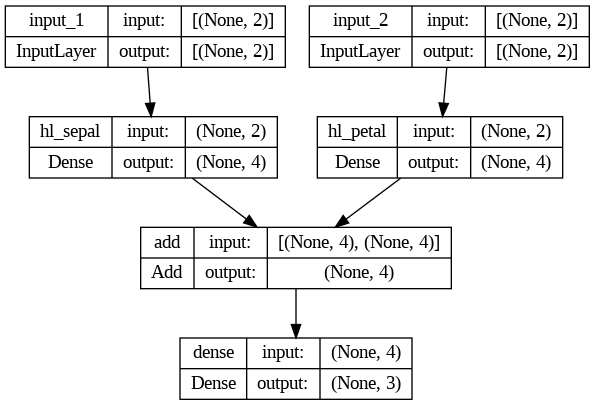

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

## 학습 시켜보기!

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss", min_delta = 0, patience = 5, verbose = 1,
                   restore_best_weights = True)

In [ ]:
model.fit([tr_x_se, tr_x_pe], train_y, validation_split = 0.2, epochs = 10000, verbose = 1, callbacks = [es])

Epoch 1/10000
3/3 [==============================] - 5s 136ms/step - loss: 2.1546 - accuracy: 0.3542 - val_loss: 2.1055 - val_accuracy: 0.3750
Epoch 2/10000
3/3 [==============================] - 0s 18ms/step - loss: 2.1064 - accuracy: 0.3542 - val_loss: 2.0551 - val_accuracy: 0.3750
Epoch 3/10000
3/3 [==============================] - 0s 18ms/step - loss: 2.0582 - accuracy: 0.3542 - val_loss: 2.0052 - val_accuracy: 0.3750
Epoch 4/10000
3/3 [==============================] - 0s 25ms/step - loss: 2.0064 - accuracy: 0.3542 - val_loss: 1.9563 - val_accuracy: 0.3750
Epoch 5/10000
3/3 [==============================] - 0s 17ms/step - loss: 1.9596 - accuracy: 0.3542 - val_loss: 1.9075 - val_accuracy: 0.3750
Epoch 6/10000
3/3 [==============================] - 0s 18ms/step - loss: 1.9117 - accuracy: 0.3542 - val_loss: 1.8591 - val_accuracy: 0.3750
Epoch 7/10000
3/3 [==============================] - 0s 17ms/step - loss: 1.8642 - accuracy: 0.3542 - val_loss: 1.8114 - val_accuracy: 0.3750
Epoch

In [ ]:
y_pred = model.predict([te_x_se, te_x_pe])

1/1 [==============================] - 0s 97ms/step


In [ ]:
y_pred[:5]

array([[0.00241479, 0.4025811 , 0.5950041 ],
       [0.004478  , 0.42087588, 0.5746462 ],
       [0.03689765, 0.50293386, 0.46016848],
       [0.00072114, 0.33294228, 0.66633654],
       [0.00116439, 0.36546612, 0.6333695 ]], dtype=float32)

In [ ]:
test_y[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
# add레이어가 조금 더 성능이 안좋다?